<a href="https://colab.research.google.com/github/valesierrai/Analisis-Supervisado-para-el-AD/blob/main/Redes_Neuronales_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Redes Neuronales

##Vectorización

Un elemento importante de los *frameworks* de trabajo para redes neuronales, y es la **vectorización**. Para entender este concepto, haremos un ejemplo.

In [ ]:
#Por ejemplo, para el cálculo de la red entrada de un perceptrón

#Definimos por ejemplo, 3 entradas
x0, x1 , x2 = 1., 2., 3.
bias, w1, w2 = 0.1, 0.2, 0.3

x = [x0, x1, x2]
w = [bias, w1, w2]

#Si fuésemos a calcular la salida de forma tradicional, tendríamos que usar un ciclo

#Inicializamos la salida con 0
z = 0

for i in range(len(x)):
    z += x[i]*w[i]

print(z)

1.4


In [ ]:
#Por comprehension (sigue siendo una operación no vectorizada, pero se resume en una sola línea de codigo)

z = sum(x_i * w_i for x_i, w_i in zip(x, w))
print(z)

#Meter un ciclo dentro de una función

1.4


In [ ]:
#En forma de vectorización, se haría así (trabajo en paralelo)
import numpy as np

#Inicialmente, x y w son listas, necesitamos convertirlas en arreglos numéricos
x_vec, w_vec= np.array(x), np.array(w)

z = np.dot(x_vec, w_vec)
print(z)

1.4


*La vectorización me evita los ciclos

##Implementamos de un perceptrón con *PyTorch*

In [ ]:
#Importamos las Librerias Necesarias
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import torch
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Cargamos la base de datos
data = np.genfromtxt('/content/drive/MyDrive/Colab Notebooks/Aprendizaje Supervisado/perceptron_toydata.txt', delimiter = '\t')

In [ ]:
#Separamos los datos de la etiqueta (la variable a predecir)
X, y = data[:, :2], data[:, 2]

#Castiamos el tipo de dato de y para quesea entero
y = y.astype(int)

In [ ]:
#Vamos a generar la partición para train y test

#Primero generamos los indices aleatorios para cada conjunto
shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(seed = 123)
shuffle_rng.shuffle(shuffle_idx)

#Reasignamos x e y
X, y = X[shuffle_idx], y[shuffle_idx]

#Generamos la separación de los conjuntos
X_train, y_train = X[shuffle_idx[:70]], y[shuffle_idx[:70]]
X_test, y_test = X[shuffle_idx[70:]], y[shuffle_idx[70:]]

In [ ]:
#Aplicamos estandarización como preprocesamiento
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

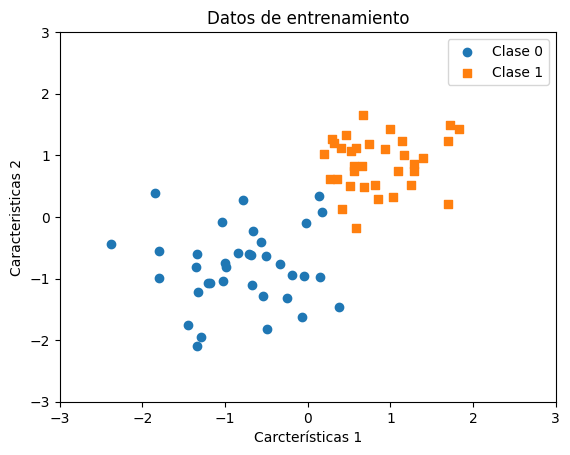

In [ ]:
#Graficamos para observar la distribución de los datos
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0,1], label = 'Clase 0', marker = 'o')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1,1], label = 'Clase 1', marker = 's')

plt.title('Datos de entrenamiento')
plt.legend()
plt.xlabel('Carcterísticas 1')
plt.ylabel('Caracteristicas 2')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()

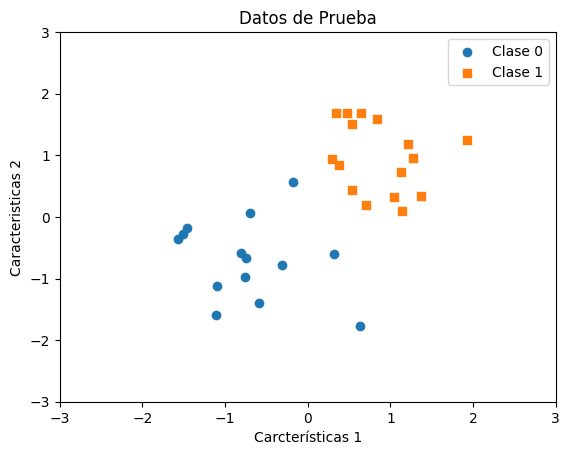

In [ ]:
#Graficamos ahora la distribución de los datos 'test'
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0,1], label = 'Clase 0', marker = 'o')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1,1], label = 'Clase 1', marker = 's')

plt.title('Datos de Prueba')
plt.legend()
plt.xlabel('Carcterísticas 1')
plt.ylabel('Caracteristicas 2')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()